# Central Limit Theorem

### Підключаємо необхідні бібліотеки

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Для прикладу використаємо [хi-квадрат розподіл](https://en.wikipedia.org/wiki/Chi-squared_distribution)

### Дисперсія такого розподілу дорівнює k, а середнє значення - 2k, де k -  деяка стала (ступінь свободи)

In [11]:
n = 1000 #кількість елементів вибірки
k = 5 #значенння ступеня свободи
chi = sts.chi2(k)
sample = chi.rvs(n) #генеруємо вибірку з n елементів

Text(0.5, 0, '$x$')

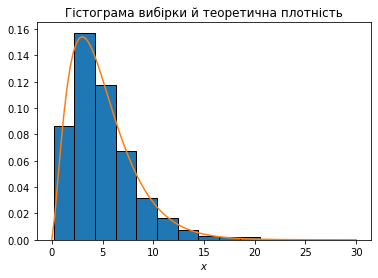

In [17]:
x = np.linspace(0, 30, 100)
plt.hist(sample, density=True, histtype='bar', bins=10, ec='black')
plt.plot(x, chi.pdf(x))
plt.title("Гістограма вибірки й теоретична плотність")
plt.xlabel('$x$')

### Напишемо фунцію для отримання середнього значення по вибірці довільної величини

In [34]:
def get_sample_mean(size):
    sample_mean = []

    for i in range(1000):
        sample = chi.rvs(size) #1000 разів створюємо вибірку розміру size1
        sample_mean.append(sum(sample) / size) #шукаємо середнє значення в кожній вибірці й додаємо до масиву

    sample_mean = np.array(sample_mean) #перейшли від масиву до numpy-масиву
    return sample_mean

###  Напишемо функцію для створення приближеного нормального розподілу й гістаграми отриманих середніх значень

In [44]:
def plot_hist(sample_mean, size):
    plt.hist(sample_mean, density=True, bins = 20, histtype='bar', ec='black')
    plt.title('Гістограма розподілу середніх вибірки при $n={}$ і \n плотність нормального розподілу, побудованого за CLT'.format(size))

    norm = sts.norm(k, np.sqrt(2*k / size)) # записуємо наш нормальний розподіл за CLT
    x = np.linspace(0, 20, 100)
    plt.plot(x, norm.pdf(x))
    plt.xlabel('x')

### Розглянемо результати для різних розмірів вибірки

In [40]:
size1 = 5
size2 = 10
size3 = 50

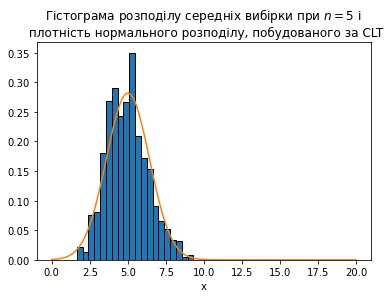

In [45]:
sample_mean = get_sample_mean(size1)
plot_hist(sample_mean, size1)

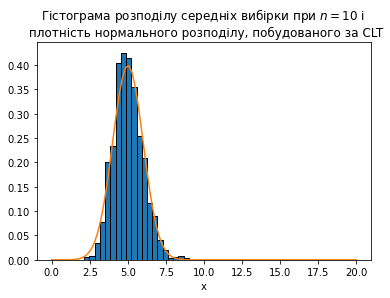

In [46]:
sample_mean = get_sample_mean(size2)
plot_hist(sample_mean, size2)

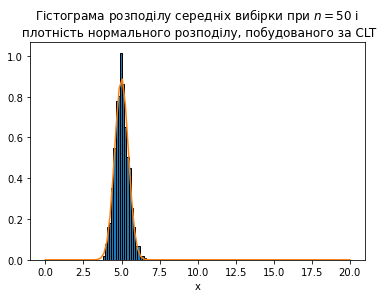

In [47]:
sample_mean = get_sample_mean(size3)
plot_hist(sample_mean, size3)

## Висновок

### З наведених вище малюнків видно, що центральна гранична теорема добре виконується навіть на невеликих вибірках з хі-квадрат розподілу, так як він є не сильно скошеним і близький за формою до нормального (при $ k = 5 $). При збільшенні розміру вибірки $ n $ гістограма вибіркових середніх все більше наближається до плотності нормального розподілу. Також видно, що при збільшенні розміру вибірки $ n $ пік стає все вище (дисперсія обернено пропорційна $ n $). В цілому спостерігається гарна відповідність отриманих результатів центральній граничній теоремі.